
#Disclaimer
# The sole purpose of this work is to test my skills and it's not intended to generate any conclusions about the COVID-19 outbreak. For accurate information regarding the pandemic always consult with local autorities.
<p><img style="float: center; margin:5px 20px 5px 1px; width:20%" src="https://www.nps.gov/aboutus/news/images/CDC-coronavirus-image-23311-for-web.jpg?maxwidth=650&autorotate=false"></p>
<p>The data used on this notebook is from the Johns Hopkins University's <a href="https://github.com/RamiKrispin/coronavirus">publicly available data repository</a>. Created to consolidate data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.
</p>

## Importing necessary packages

In [57]:
library(readr)
library(ggplot2)
library(dplyr)

# Comparisson betwen cumulative cases on Brasil, China and US

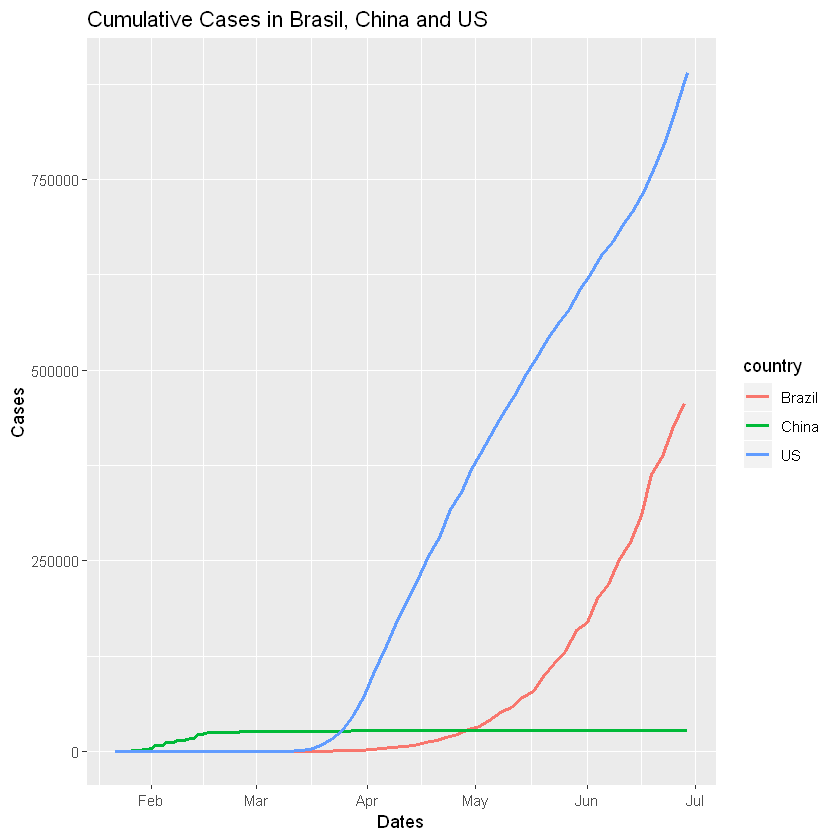

In [85]:
options(warn=-1)

cumulative_cases_by_countries <- read.csv("datasets/coronavirus.csv", colClasses=c("Date",NA,NA,NA,NA,NA,"double")) %>%
    select(date, country, province, type, cases) %>%
    filter(type == "confirmed", country == c("Brazil", "China", "US")) %>%
    group_by(date, country) %>%
    summarise(cases = sum(cases)) %>%
    ungroup() %>%
    group_by(country) %>%
    mutate(cum_cases = cumsum(cases), cases= NULL)


ggplot(cumulative_cases_by_countries, aes(x = date, y = cum_cases ,color = country)) +
    geom_line(size = 1) +
   # geom_smooth( se = FALSE, method="lm") +
    ylab("Cases") +
    xlab("Dates")+
    ggtitle("Cumulative Cases in Brasil, China and US")

# Cumulative cases worldwide (linear and logarithmic scales)

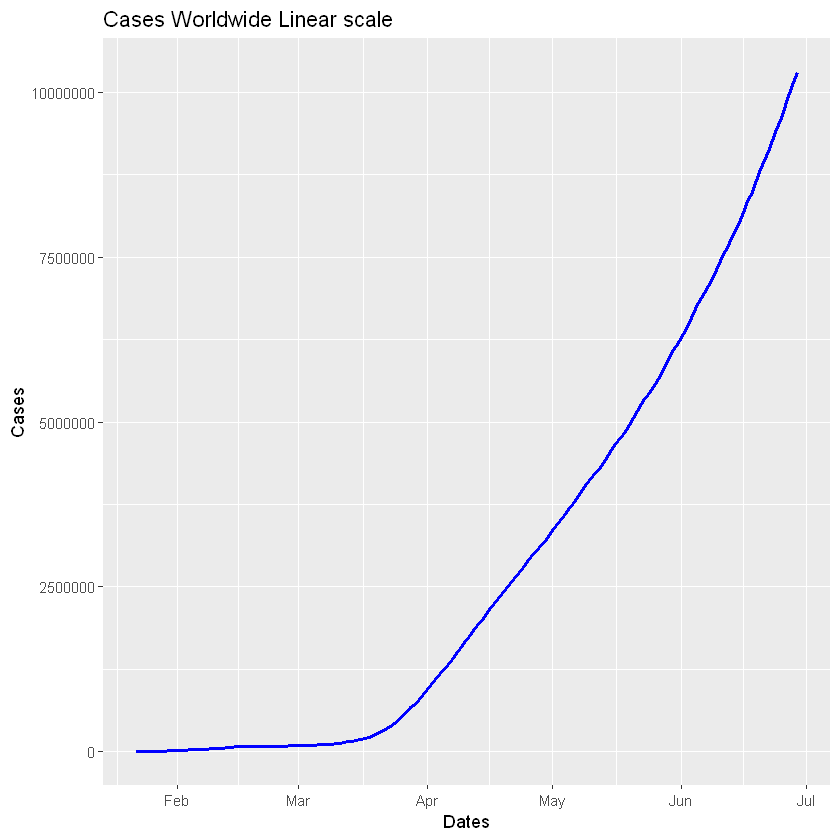

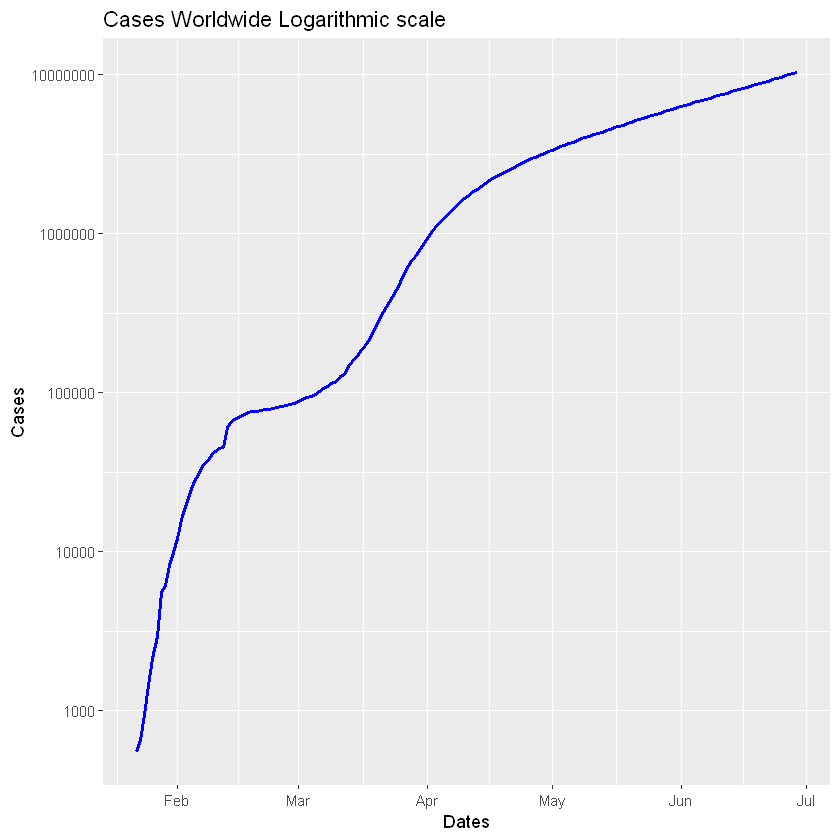

In [71]:
cumulative_cases_worldwide <- read.csv("datasets/coronavirus.csv", colClasses=c("Date",NA,NA,NA,NA,NA,"double")) %>%
    select(date,country,type,cases) %>%
    filter(type == "confirmed") %>%
    count(date, wt=cases) %>%
    mutate(cum_cases = cumsum(n), n = NULL)

plt_cases_worldwide <- ggplot(cumulative_cases_worldwide, aes(x = date, y = cum_cases)) +
    geom_line(size = 1, col = "blue") +
    #geom_smooth( se = FALSE, method="lm") +
    ylab("Cases") +
    #scale_y_log10() +
    xlab("Dates") 

plt1 <-plt_cases_worldwide +
    ggtitle("Cases Worldwide Linear scale")


plt2 <- plt_cases_worldwide +
    scale_y_log10()+
      ggtitle("Cases Worldwide Logarithmic scale")

plt1
plt2

# Anotating Important events on Cases Worldwide

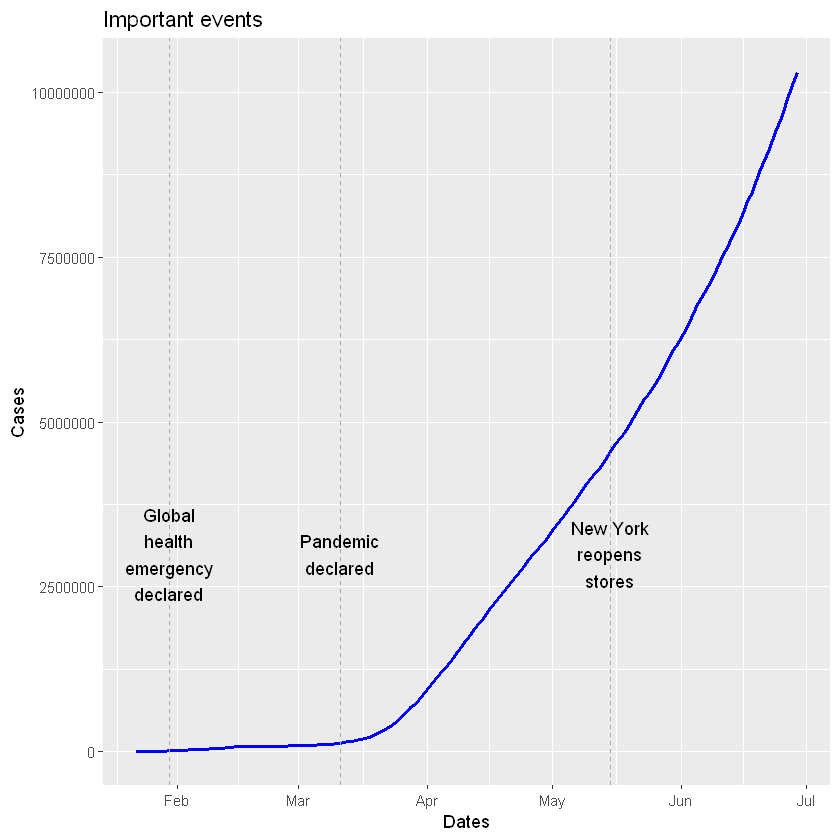

In [89]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global\nhealth\nemergency\ndeclared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-05-15", "New York\nreopens\nstores"
) %>%
  mutate(date = as.Date(date))

# Using who_events, add vertical dashed lines with an xintercept at date
# and text at date, labeled by event, and at 100000 on the y-axis

plt_cases_worldwide +
  geom_vline(aes(xintercept = date), data = who_events, linetype = "dashed", color = "darkgray") +
  geom_text(aes(x = date, label = event), data = who_events, y= 3000000) +
    ggtitle("Important events")

# Adding trend line to Brazil

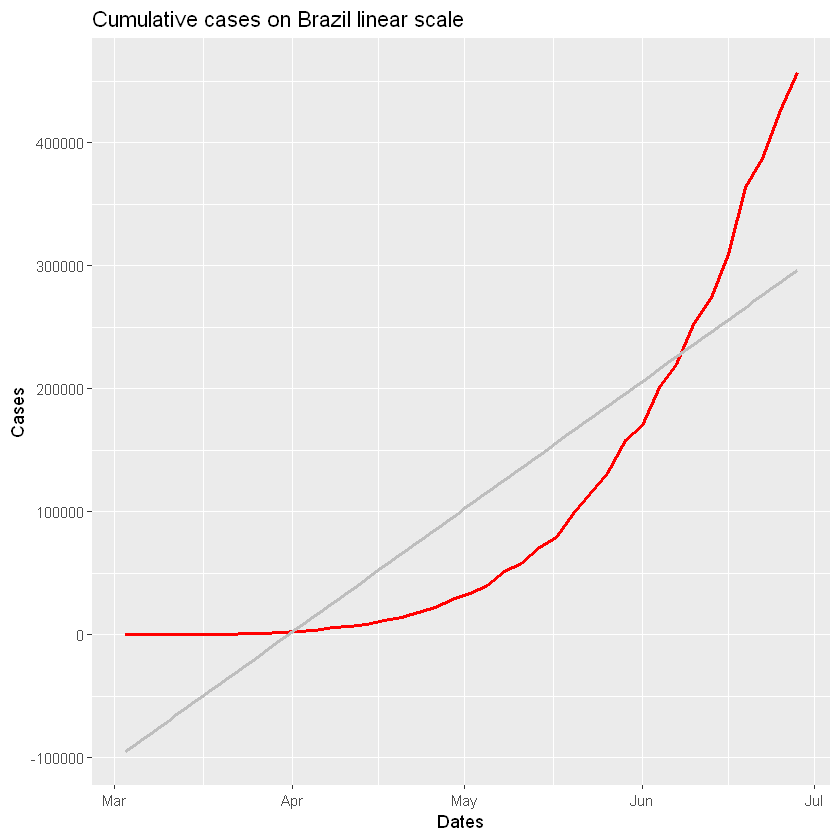

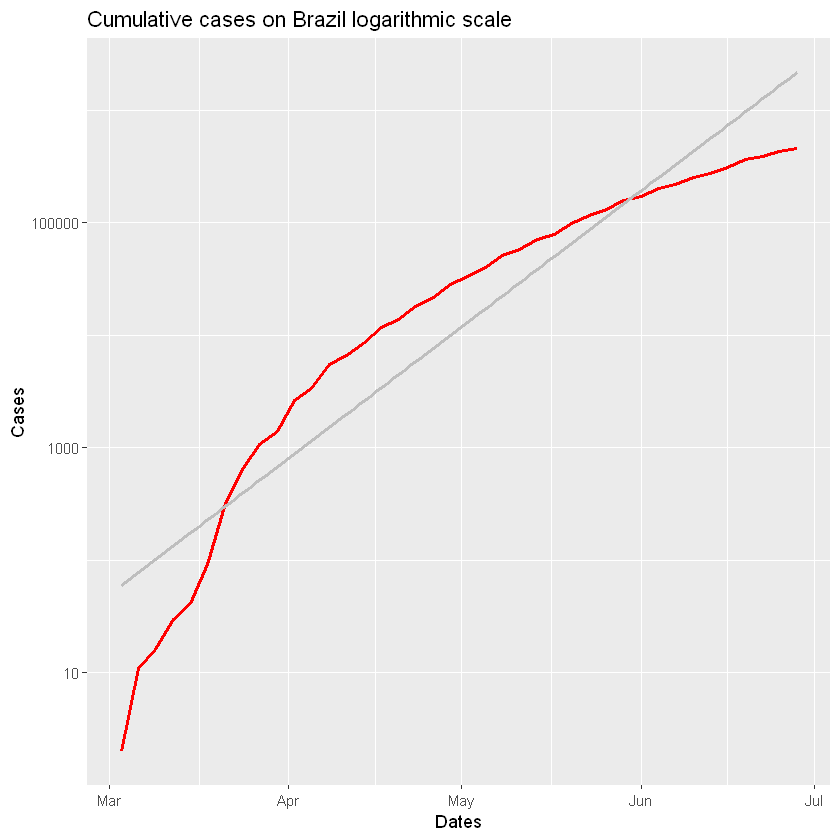

In [88]:
cumulative_cases_brazil <- cumulative_cases_by_countries %>%
    filter(country == "Brazil", date >= "2020-03-1")

plt_brazil_01april <- ggplot(cumulative_cases_brazil, aes(x = date, y = cum_cases)) +
    geom_line(size = 1, col = "red") +
    geom_smooth( se = FALSE, method="lm", col = "grey") +
    ylab("Cases") +
    xlab("Dates")


plt_brazil_01april +
    ggtitle("Cumulative cases on Brazil linear scale")

plt_brazil_01april +
    scale_y_log10() +
    ggtitle("Cumulative cases on Brazil logarithmic scale")